# Table of Contents
- [Data Understanding]()
- [Import Python Packages & Dataset]()
- [Data Description]()
- [Exploratory Data Analysis]()
- [Summaries]()

# Data Understanding
This dataset contains data on the number of visitors to tourist attractions based on the type of tourist and the district/city in West Java Province from 2014 to 2021. This dataset comes from [Open Data Jabar](https://opendata.jabarprov.go.id/id/dataset/jumlah-pengunjung-ke-objek-wisata-berdasarkan-jenis-wisatawan-dan-kabupatenkota-di-jawa-barat). Analysis of this dataset will be useful in increasing insight into the main analysis in the project, which is traffic in the districts/cities of West Java Province.

![Ilustrasi liburan di Jawa Barat (travel.okezone.com/)](https://img.okezone.com/content/2022/05/25/406/2600024/jawa-barat-targetkan-kunjungan-40-juta-wisatawan-lokal-di-2022-NXbj0thQ5h.jpg)

# Import Python Packages & Dataset

## Python Packages Used in the Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


## Dataset Used in The Analysis

In [2]:
df = pd.read_csv(
    "../../data/external-data/Data Pengunjung Objek Wisata di Jawa Barat.csv"
)
df.head()


,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_wisatawan,jumlah_pengunjung,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,MANCANEGARA,54927,ORANG,2014
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,NUSANTARA,4075198,ORANG,2014
2,3,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,MANCANEGARA,49985,ORANG,2014
3,4,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,NUSANTARA,2031979,ORANG,2014
4,5,32,JAWA BARAT,3203,KABUPATEN CIANJUR,MANCANEGARA,7824,ORANG,2014


# Data Description

## Checking the Size of the Dataset

In [3]:
df.shape

(403, 9)

It can be seen that the dataset has 403 rows and 9 columns.

## Checking Data Type of Each Column

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   403 non-null    int64 
 1   kode_provinsi        403 non-null    int64 
 2   nama_provinsi        403 non-null    object
 3   kode_kabupaten_kota  403 non-null    int64 
 4   nama_kabupaten_kota  403 non-null    object
 5   jenis_wisatawan      403 non-null    object
 6   jumlah_pengunjung    403 non-null    int64 
 7   satuan               403 non-null    object
 8   tahun                403 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 28.5+ KB


Based on the information above, it can be seen that this dataset does not have missing values and the data type of each column is appropriate.

## Checking Duplicate Rows

In [5]:
if True in df.duplicated().tolist():
    print("There are duplicate rows in the data.")
else:
    print("There are no duplicate rows in the data")


There are no duplicate rows in the data


Based on the information above, it can be seen that this dataset does not have duplicates.

## Unique Data in Each Categorical Column

In [6]:
# List of columns to be processed
categorical_columns = [
    "kode_provinsi",
    "nama_provinsi",
    "kode_kabupaten_kota",
    "nama_kabupaten_kota",
    "jenis_wisatawan",
    "satuan",
    "tahun",
]

# Loop through each column and print the unique values
for col in categorical_columns:
    print("Unique values for column '{}': {}\n".format(col, df[col].unique()))


Unique values for column 'kode_provinsi': [32]

Unique values for column 'nama_provinsi': ['JAWA BARAT']

Unique values for column 'kode_kabupaten_kota': [3201 3202 3203 3204 3205 3206 3207 3208 3209 3210 3211 3212 3213 3214
 3215 3216 3217 3271 3272 3273 3274 3275 3276 3277 3278 3279 3218]

Unique values for column 'nama_kabupaten_kota': ['KABUPATEN BOGOR' 'KABUPATEN SUKABUMI' 'KABUPATEN CIANJUR'
 'KABUPATEN BANDUNG' 'KABUPATEN GARUT' 'KABUPATEN TASIKMALAYA'
 'KABUPATEN CIAMIS' 'KABUPATEN KUNINGAN' 'KABUPATEN CIREBON'
 'KABUPATEN MAJALENGKA' 'KABUPATEN SUMEDANG' 'KABUPATEN INDRAMAYU'
 'KABUPATEN SUBANG' 'KABUPATEN PURWAKARTA' 'KABUPATEN KARAWANG'
 'KABUPATEN BEKASI' 'KABUPATEN BANDUNG BARAT' 'KOTA BOGOR' 'KOTA SUKABUMI'
 'KOTA BANDUNG' 'KOTA CIREBON' 'KOTA BEKASI' 'KOTA DEPOK' 'KOTA CIMAHI'
 'KOTA TASIKMALAYA' 'KOTA BANJAR' 'KABUPATEN PANGANDARAN']

Unique values for column 'jenis_wisatawan': ['MANCANEGARA' 'NUSANTARA']

Unique values for column 'satuan': ['ORANG']

Unique values for 

It can be seen that all the values in the categorical column are consistent.

## Checking the Distribution of Numeric Data

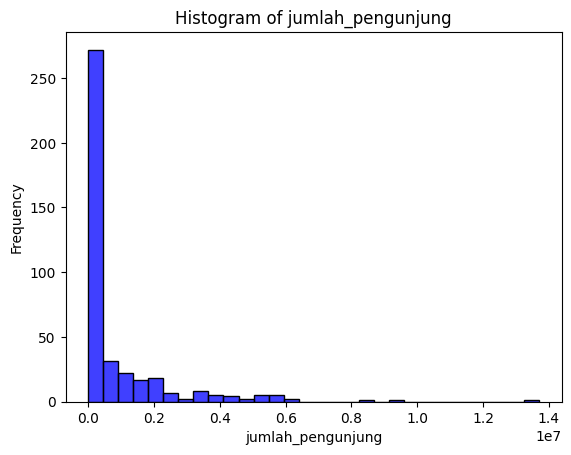

In [7]:
# Select the column that you want to visualize
numerical_column = "jumlah_pengunjung"

# Plot the histogram of the selected column using Seaborn
sns.histplot(df[numerical_column], bins=30, color="blue", kde=False)

# Add labels and title to the plot
plt.xlabel(numerical_column)
plt.ylabel("Frequency")
plt.title("Histogram of {}".format(numerical_column))

# Show the plot
plt.show()


It can be seen that the distribution of the numeric data is "left-skewed". This means that most of the data is concentrated on lower values and there are some higher outliers.

# Exploratory Data Analysis

## Selecting Data Based on Cities in the Waze Dataset
Based on the main dataset in the analysis, which is the Waze dataset, I will select data based on the cities in the Waze dataset. The cities are:
- KABUPATEN BANDUNG
- KOTA BANJAR
- KABUPATEN BEKASI
- KOTA BOGOR
- KOTA CIMAHI
- KOTA CIREBON
- KOTA DEPOK
- KABUPATEN SUKABUMI
- KABUPATEN TASIKMALAYA

In [8]:
# Select the column you want to filter on
column = "nama_kabupaten_kota"

# Define the values you want to keep
values_to_keep = [
    "KABUPATEN BANDUNG",
    "KOTA BANJAR",
    "KABUPATEN BEKASI",
    "KOTA BOGOR",
    "KOTA CIMAHI",
    "KOTA CIREBON",
    "KOTA DEPOK",
    "KABUPATEN SUKABUMI",
    "KABUPATEN TASIKMALAYA",
]

# Create a mask that only keeps the rows with values you want to keep
mask = df[column].isin(values_to_keep)

# Apply the mask to the DataFrame to get the filtered data
filtered_df = df[mask]

# Remove 'KOTA' and 'KABUPATEN from column
filtered_df[column] = (
    filtered_df[column].copy().str.replace("KOTA", "").str.replace("KABUPATEN", "")
)
# Make it lowercase
filtered_df[column] = filtered_df[column].copy().str.title()


## Calculating Total Visitors Count by Year and City
Next, I want to see the total number of tourists per year for each city/regency.

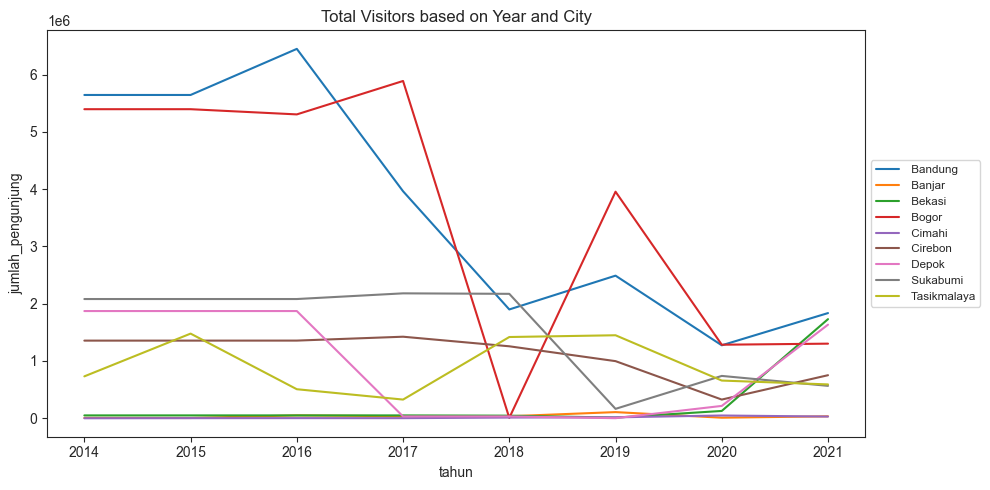

In [9]:
# Group the data by year and city
df_agg = (
    filtered_df[["nama_kabupaten_kota", "jumlah_pengunjung", "tahun"]]
    .groupby(["tahun", "nama_kabupaten_kota"])
    .sum()
)

# Reset the index to make the year and city columns into separate columns again
df_agg = df_agg.reset_index()

# Change the style of plot
sns.set_style('ticks')

# create a figure object and set its size
fig = plt.figure(figsize=(10, 5))

# Plot the total visitors count by year and city
sns.lineplot(x="tahun", y="jumlah_pengunjung", hue="nama_kabupaten_kota", data=df_agg)

# Add a title to the plot
plt.title("Total Visitors based on Year and City")

# Set the legend
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), ncol=1, fontsize="small")

# Show the plot
plt.tight_layout()
plt.show()


## Visitor Progress in Each City Over the Last Two Years

In [10]:
# Pivot the data so that each row represents a city, and each column represents a year
mask = df_agg["tahun"].isin([2021, 2020])
df_pivot = df_agg[mask]
df_pivot = df_pivot.pivot(
    index="nama_kabupaten_kota", columns="tahun", values="jumlah_pengunjung"
)

# Calculate the percentage increase between 2020 and 2021
df_pivot["Progress Pengunjung 2 tahun terakhir (%)"] = (
    (df_pivot[2021] - df_pivot[2020]) / df_pivot[2020] * 100
)
df_pivot.sort_values(
    "Progress Pengunjung 2 tahun terakhir (%)", inplace=True, ascending=False
)

# Show the result
df_pivot


tahun,2020,2021,Progress Pengunjung 2 tahun terakhir (%)
nama_kabupaten_kota,,,
Bekasi,127500,1730651,1257.373333
Depok,215466,1633958,658.336814
Banjar,9832,33900,244.792514
Cirebon,326329,751819,130.386818
Bandung,1274026,1836675,44.163070
Bogor,1284090,1302719,1.450755
Tasikmalaya,658304,590908,-10.237823
Sukabumi,739368,565822,-23.472209
Cimahi,48177,29533,-38.698964


## Average Total Visitors in Each City

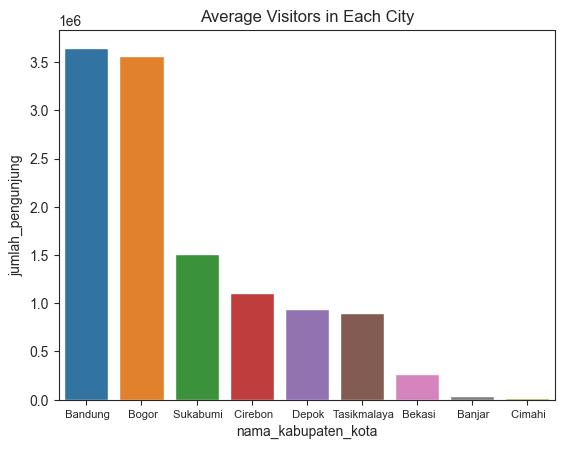

In [11]:
# menghitung rata-rata pengunjung setiap tahunnya di masing-masing nama_kabupaten_kota
df_mean = (
    df_agg.groupby("nama_kabupaten_kota")["jumlah_pengunjung"].mean().reset_index()
)

# sortir data tersebut dari yang paling tinggi nilainya
df_mean = df_mean.sort_values(by="jumlah_pengunjung", ascending=False)

# membuat visualisasi bar chart
sns.barplot(x="nama_kabupaten_kota", y="jumlah_pengunjung", data=df_mean)
plt.xticks(fontsize=8)
plt.title("Average Visitors in Each City")
plt.show()


# Summaries

- Based on the results of our analysis of visitor data, it appears that the city with the highest average total number of visitors and a positive trend in total visitor growth over the past two years is Bandung.
- This is an interesting finding, as it suggests that Bandung is a popular destination for tourists. However, in order to get a more complete understanding of this trend, we will also need to analyze traffic data in the city.
- By analyzing both visitor and traffic data, we can gain a better understanding of the city's overall tourist activity, including factors such as peak tourist seasons, popular tourist destinations, and the impact of tourism on the city's infrastructure and transportation.
- By connecting these two sets of data, we can make more informed decisions on how to better accommodate the needs of tourists, while also balancing the needs of the local community.